### VADER

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import re

from time import time
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

In [3]:
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Training set

In [2]:
columns = ['id','text_final', 'polarity', 'length']

dftrain = pd.read_csv('finaltrain.csv',
                     header = 0, 
                     usecols = [1,2], 
                     names=columns,
                     encoding ='ISO-8859-1')

In [3]:
dftrain.head(10)

,text_final,polarity
0,"@USER @URL - aw , that ' s a bummer . you sho...",0
1,is upset that he can not update his facebook b...,0
2,@USER i dived many times for the ball . manage...,0
3,my whole body feels itchy and like its on fire,0
4,"@USER no , it ' s not behaving at all . i am m...",0
5,@USER not the whole crew,0
6,need a hug,0
7,@USER hey long time no see ! yes . rains a bi...,0
8,@USER nope they did not have it,0
9,@USER que me muera ?,0


In [4]:
dftrain.tail(10)

,text_final,polarity
1596365,@USER im glad ur doing well,4
1596366,woo ! xbox is back,4
1596367,@USER @USER m that sounds absolutely perfect ...,4
1596368,recovering from the long weekend,4
1596369,"@USER yeah , that does work better than just w...",4
1596370,just woke up . having no school is the best fe...,4
1596371,thewdb . com - very cool to hear old walt inte...,4
1596372,are you ready for your mojo makeover ? ask me ...,4
1596373,happy 3 8 th birthday to my boo of all time !...,4
1596374,happy charity tuesday @USER @USER @USER,4


#### Transform polarity 4 in 1 (positive class)

In [5]:
dftrain['polarity'].replace(to_replace=[4],value=1,inplace=True)

In [6]:
print("negative tweets:", len(dftrain[dftrain['polarity']==0]))
print("positive tweets:", len(dftrain[dftrain['polarity']==1]))

negative tweets: 798233
positive tweets: 798142


In [7]:
dftrain.tail()

,text_final,polarity
1596370,just woke up . having no school is the best fe...,1
1596371,thewdb . com - very cool to hear old walt inte...,1
1596372,are you ready for your mojo makeover ? ask me ...,1
1596373,happy 3 8 th birthday to my boo of all time !...,1
1596374,happy charity tuesday @USER @USER @USER,1


#### Apply VADER

In [8]:
%time   #to calulate the time it takes the algorithm to compute a VADER score

i=0 #counter

compval1 = [ ]  #empty list to hold our computed 'compound' VADER scores


while (i<len(dftrain)):

    k = analyser.polarity_scores(dftrain.iloc[i]['text_final'])
    compval1.append(k['compound'])
    
    i = i+1
    
#converting sentiment values to numpy for easier usage

compval1 = np.array(compval1)

len(compval1)

Wall time: 0 ns


1596375

In [9]:
dftrain.head()

,text_final,polarity
0,"@USER @URL - aw , that ' s a bummer . you sho...",0
1,is upset that he can not update his facebook b...,0
2,@USER i dived many times for the ball . manage...,0
3,my whole body feels itchy and like its on fire,0
4,"@USER no , it ' s not behaving at all . i am m...",0


In [10]:
dftrain['VADER_score'] = compval1

In [11]:
dftrain.tail()

,text_final,polarity,VADER_score
1596370,just woke up . having no school is the best fe...,1,0.5423
1596371,thewdb . com - very cool to hear old walt inte...,1,0.4376
1596372,are you ready for your mojo makeover ? ask me ...,1,0.3612
1596373,happy 3 8 th birthday to my boo of all time !...,1,0.6114
1596374,happy charity tuesday @USER @USER @USER,1,0.7579


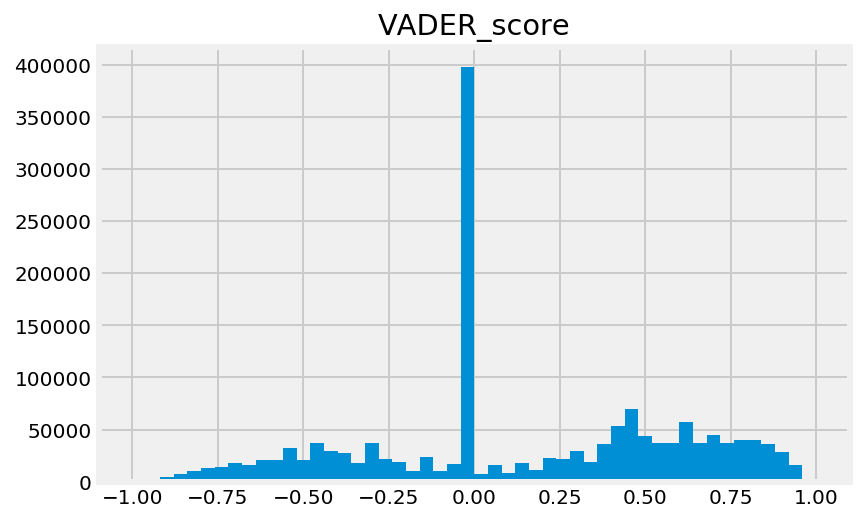

In [19]:
dftrain.hist('VADER_score', bins = 50)
plt.savefig('VADER_train.png',bbox_inches="tight")
plt.show()

In [20]:
scores_train = dftrain['VADER_score'].tolist()

In [21]:
y_train = dftrain['polarity'].tolist()

In [22]:
list(zip(scores_train,y_train))

[(-0.3818, 0),
 (-0.75, 0),
 (0.4939, 0),
 (-0.25, 0),
 (-0.6597, 0),
 (0.0, 0),
 (0.4767, 0),
 (0.807, 0),
 (0.0, 0),
 (0.0, 0),
 (0.0, 0),
 (0.0, 0),
 (-0.5994, 0),
 (-0.1027, 0),
 (0.3724, 0),
 (0.3987, 0),
 (-0.9081, 0),
 (0.0, 0),
 (0.6696, 0),
 (0.1779, 0),
 (0.0, 0),
 (-0.1779, 0),
 (0.0, 0),
 (0.3818, 0),
 (0.0, 0),
 (-0.5719, 0),
 (-0.4767, 0),
 (-0.5719, 0),
 (0.7669, 0),
 (-0.024, 0),
 (-0.4019, 0),
 (-0.2144, 0),
 (0.0, 0),
 (0.5983, 0),
 (-0.4767, 0),
 (-0.4939, 0),
 (-0.6711, 0),
 (-0.1511, 0),
 (0.2411, 0),
 (-0.1531, 0),
 (-0.1419, 0),
 (0.0, 0),
 (-0.8609, 0),
 (0.2481, 0),
 (-0.5719, 0),
 (0.629, 0),
 (0.3612, 0),
 (0.5719, 0),
 (-0.6486, 0),
 (-0.2578, 0),
 (-0.2023, 0),
 (0.7845, 0),
 (0.0, 0),
 (-0.2263, 0),
 (0.4767, 0),
 (-0.2134, 0),
 (-0.5719, 0),
 (-0.3818, 0),
 (-0.4215, 0),
 (0.6662, 0),
 (0.1431, 0),
 (0.0, 0),
 (0.1655, 0),
 (-0.4215, 0),
 (-0.1779, 0),
 (0.3935, 0),
 (0.0, 0),
 (-0.7783, 0),
 (0.0, 0),
 (0.2732, 0),
 (-0.3131, 0),
 (0.3802, 0),
 (0.2484, 

In [23]:
accuracy = 0
for prediction,correct in zip(scores_train, y_train):
    if prediction>0 and correct==1 or prediction<=0 and correct==0:
        accuracy += 1
print(accuracy/len(scores_train))

0.6564190744655861


#### Save csv

In [25]:
dftrain.to_csv('VADER_train.csv')

#### Plot

In [26]:
pd.set_option('float_format', '{:f}'.format)

In [27]:
dftrain.describe()

,polarity,VADER_score
count,1596375.000000,1596375.000000
mean,0.499971,0.142852
std,0.500000,0.461705
min,0.000000,-0.998500
25%,0.000000,-0.128000
50%,0.000000,0.000000
75%,1.000000,0.534600
max,1.000000,0.998700


In [38]:
dftrain['VADER_score'].count()

1596375

In [6]:
columns = ['id','text_final', 'polarity', 'VADER_score']

df_vader_train = pd.read_csv('VADER_train.csv',
                     header = 0, 
                     usecols = [1,2,3], 
                     names=columns,
                     encoding ='ISO-8859-1')

In [7]:
df_vader_train.head()

,text_final,polarity,VADER_score
0,"@USER @URL - aw , that ' s a bummer . you sho...",0,-0.3818
1,is upset that he can not update his facebook b...,0,-0.7500
2,@USER i dived many times for the ball . manage...,0,0.4939
3,my whole body feels itchy and like its on fire,0,-0.2500
4,"@USER no , it ' s not behaving at all . i am m...",0,-0.6597


In [10]:
min_max_scaler = preprocessing.MinMaxScaler()

In [11]:
# Create x, where x the 'scores' column's values as floats
x = df_vader_train[['VADER_score']].values.astype(float)

In [12]:
x

array([[-0.3818],
       [-0.75  ],
       [ 0.4939],
       ...,
       [ 0.3612],
       [ 0.6114],
       [ 0.7579]])

In [13]:
VADER_scaled = min_max_scaler.fit_transform(x)

In [14]:
VADER_scaled

array([[0.3087823 ],
       [0.12442419],
       [0.74724614],
       ...,
       [0.68080312],
       [0.80607851],
       [0.8794312 ]])

In [24]:
df_vader_train['VADER_scaled'] = VADER_scaled

In [25]:
df_vader_train.head()

,text_final,polarity,VADER_score,VADER_scaled
0,"@USER @URL - aw , that ' s a bummer . you sho...",0,-0.3818,0.308782
1,is upset that he can not update his facebook b...,0,-0.7500,0.124424
2,@USER i dived many times for the ball . manage...,0,0.4939,0.747246
3,my whole body feels itchy and like its on fire,0,-0.2500,0.374775
4,"@USER no , it ' s not behaving at all . i am m...",0,-0.6597,0.169637


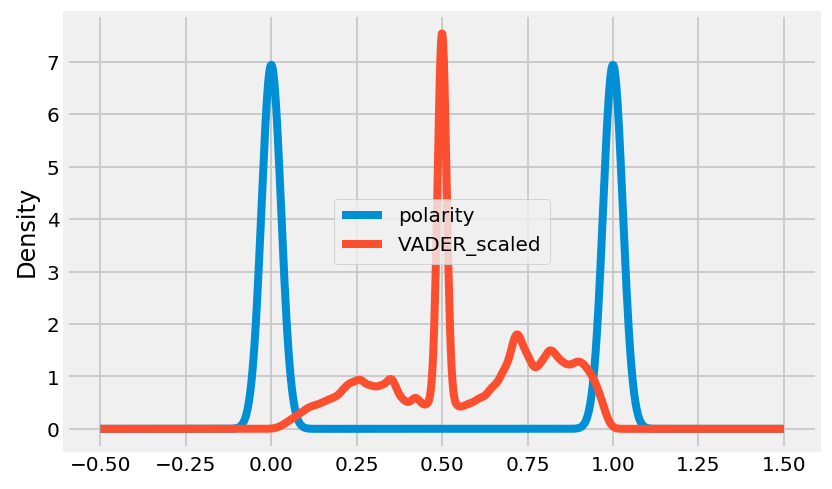

Wall time: 3min 10s


In [27]:
%%time
df_vader_train[['polarity','VADER_scaled']].plot.kde()
plt.savefig('VADER_Polarity.png',bbox_inches="tight")
plt.show()

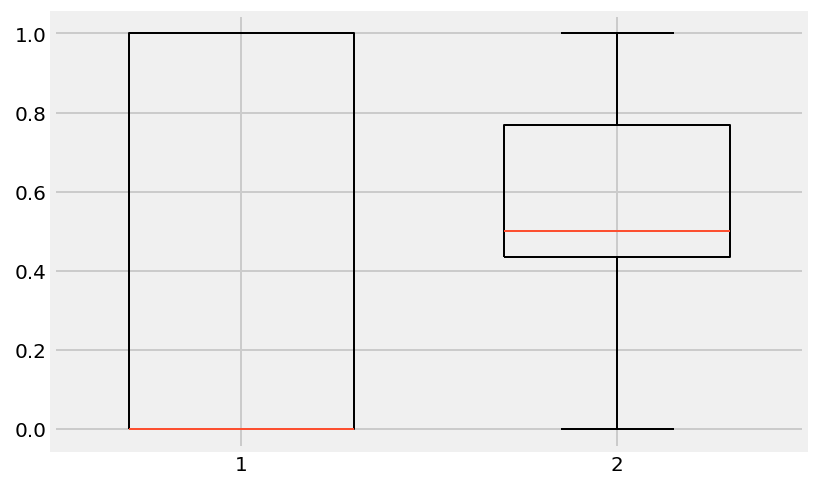

In [29]:
plt.boxplot(df_vader_train[['polarity','VADER_scaled']].values, widths = 0.6)
plt.savefig('VADER_boxplot.png',bbox_inches="tight")
plt.show()

## Vader test set

In [26]:
columns = ['id','text_final', 'polarity', 'length']

dftest = pd.read_csv('finaltest.csv',
                     header = 0, 
                     usecols = [1,2], 
                     names=columns,
                     encoding ='ISO-8859-1')

In [27]:
dftest.tail()

,text_final,polarity
354,"after using latex a lot , any other typeset ma...",4
355,"on that note , i hate word . i hate pages . i ...",0
356,ah . back in a *real* text editing environme...,4
357,"trouble in iran , i see . hmm . iran . iran so...",0
358,reading the tweets coming out of iran . the w...,0


In [28]:
dftest['polarity'].unique()

array([4, 0], dtype=int64)

In [29]:
dftest['polarity'].replace(to_replace=[4],value=1,inplace=True)

In [30]:
print("negative tweets:", len(dftest[dftest['polarity']==0]))
print("positive tweets:", len(dftest[dftest['polarity']==1]))

negative tweets: 177
positive tweets: 182


In [31]:
%time   #to calulate the time it takes the algorithm to compute a VADER score

i=0 #counter

compval1 = [ ]  #empty list to hold our computed 'compound' VADER scores


while (i<len(dftest)):

    k = analyser.polarity_scores(dftrain.iloc[i]['text_final'])
    compval1.append(k['compound'])
    
    i = i+1
    
#converting sentiment values to numpy for easier usage

compval1 = np.array(compval1)

len(compval1)

Wall time: 0 ns


359

In [32]:
dftest['VADER_score'] = compval1

In [33]:
dftest.head()

,text_final,polarity,VADER_score
0,@USER i love my kindle2 . not that the is co...,1,-0.3818
1,reading my kindle2 . love it . lee childs is...,1,-0.7500
2,"ok , first assesment of the kindle 2 . it fuc...",1,0.4939
3,@USER you will love your kindle2 . i have had ...,1,-0.2500
4,@USER fair enough . but i have the kindle2 and...,1,-0.6597


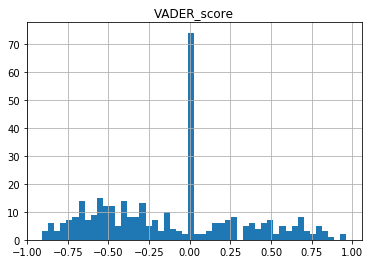

In [34]:
dftest.hist('VADER_score', bins = 50)
plt.show()

In [35]:
scores = dftest['VADER_score'].tolist()

In [36]:
y_test = dftest['polarity'].tolist()

In [37]:
list(zip(scores,y_test))

[(-0.3818, 1),
 (-0.75, 1),
 (0.4939, 1),
 (-0.25, 1),
 (-0.6597, 1),
 (0.0, 1),
 (0.4767, 0),
 (0.807, 1),
 (0.0, 1),
 (0.0, 1),
 (0.0, 0),
 (0.0, 1),
 (-0.5994, 1),
 (-0.1027, 0),
 (0.3724, 1),
 (0.3987, 0),
 (-0.9081, 1),
 (0.0, 0),
 (0.6696, 1),
 (0.1779, 1),
 (0.0, 1),
 (-0.1779, 1),
 (0.0, 1),
 (0.3818, 1),
 (0.0, 1),
 (-0.5719, 1),
 (-0.4767, 1),
 (-0.5719, 1),
 (0.7669, 1),
 (-0.024, 1),
 (-0.4019, 0),
 (-0.2144, 0),
 (0.0, 0),
 (0.5983, 0),
 (-0.4767, 0),
 (-0.4939, 1),
 (-0.6711, 1),
 (-0.1511, 1),
 (0.2411, 1),
 (-0.1531, 0),
 (-0.1419, 0),
 (0.0, 0),
 (-0.8609, 0),
 (0.2481, 0),
 (-0.5719, 0),
 (0.629, 1),
 (0.3612, 0),
 (0.5719, 1),
 (-0.6486, 1),
 (-0.2578, 1),
 (-0.2023, 0),
 (0.7845, 1),
 (0.0, 1),
 (-0.2263, 0),
 (0.4767, 0),
 (-0.2134, 1),
 (-0.5719, 1),
 (-0.3818, 1),
 (-0.4215, 0),
 (0.6662, 1),
 (0.1431, 1),
 (0.0, 1),
 (0.1655, 0),
 (-0.4215, 0),
 (-0.1779, 1),
 (0.3935, 0),
 (0.0, 1),
 (-0.7783, 1),
 (0.0, 0),
 (0.2732, 0),
 (-0.3131, 0),
 (0.3802, 0),
 (0.2484, 

In [38]:
accuracy = 0
for prediction,correct in zip(scores, y_test):
    if prediction>0 and correct==1 or prediction<=0 and correct==0:
        accuracy += 1
print(accuracy/len(scores))

0.49025069637883006
